In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [146]:
train=pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [149]:
train.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [150]:
test.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [151]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [152]:
train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [153]:
test.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
train.duplicated().sum()

0

In [156]:
train.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [157]:
train.shape

(750000, 9)

<Axes: xlabel='Height'>

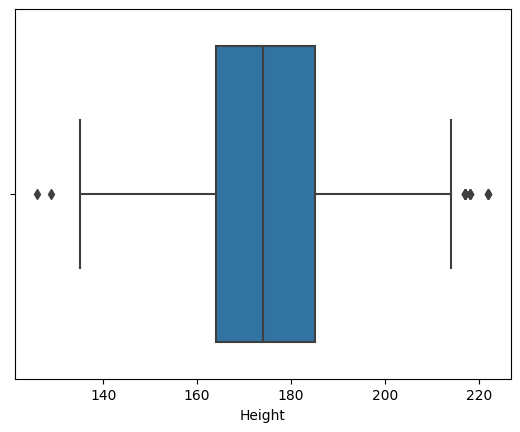

In [158]:
sns.boxplot(x=train['Height'])

<Axes: xlabel='Age'>

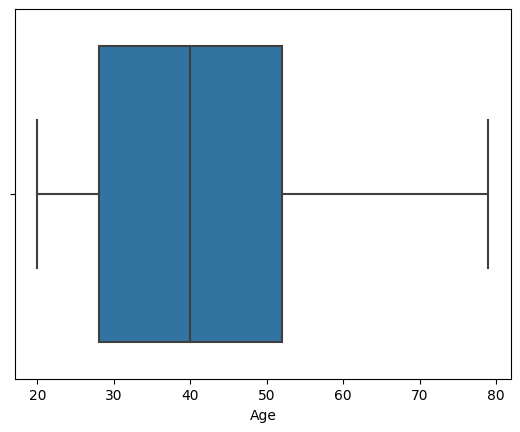

In [159]:
sns.boxplot(x=train['Age'])

<Axes: xlabel='Weight'>

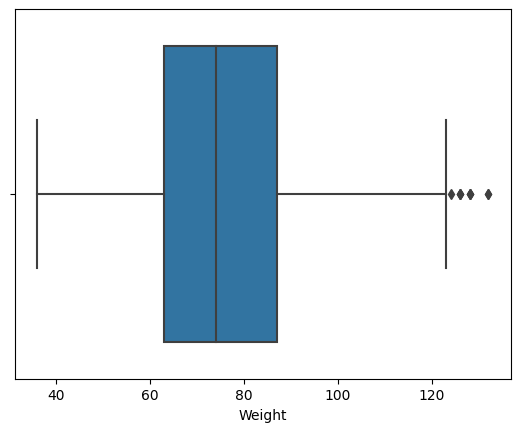

In [160]:
sns.boxplot(x=train['Weight'])

<Axes: xlabel='Height', ylabel='Weight'>

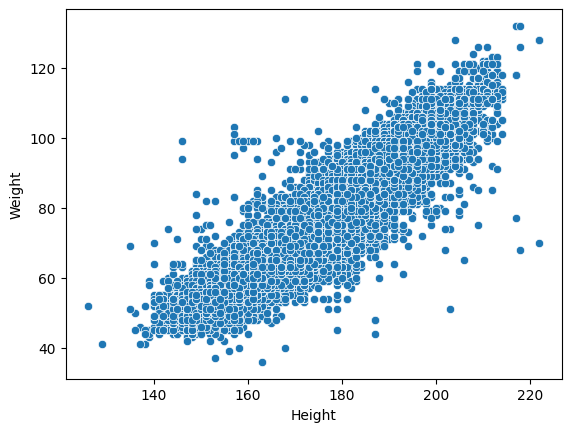

In [161]:
sns.scatterplot(x='Height', y='Weight', data=train)

<Axes: xlabel='Body_Temp', ylabel='Heart_Rate'>

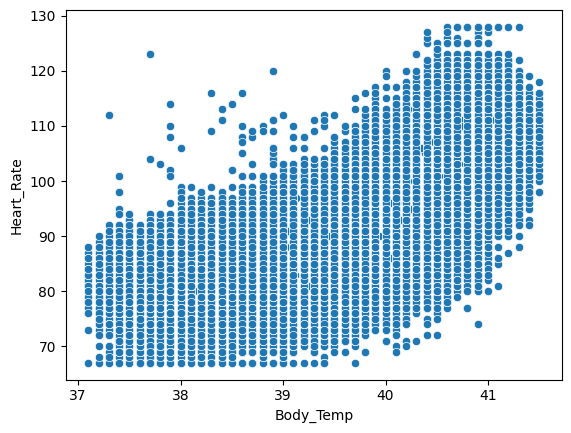

In [162]:
sns.scatterplot(y='Heart_Rate', x='Body_Temp', data=train)

<Axes: xlabel='Body_Temp', ylabel='Calories'>

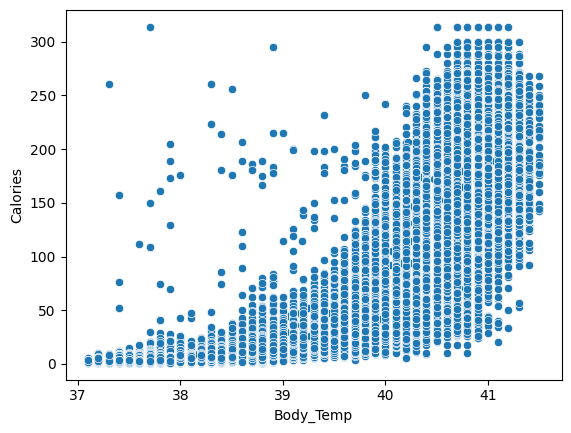

In [163]:
sns.scatterplot(x='Body_Temp', y='Calories', data=train)

In [164]:
train = pd.get_dummies(train, columns=['Sex'],dtype=int)

In [176]:
test = pd.get_dummies(test, columns=['Sex'],dtype=int)

In [177]:
test.head(5)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_female,Sex_male
0,750000,45,177.0,81.0,7.0,87.0,39.8,0,1
1,750001,26,200.0,97.0,20.0,101.0,40.5,0,1
2,750002,29,188.0,85.0,16.0,102.0,40.4,1,0
3,750003,39,172.0,73.0,20.0,107.0,40.6,1,0
4,750004,30,173.0,67.0,16.0,94.0,40.5,1,0


In [165]:
train.drop(columns='id', inplace=True)

In [166]:
train['BMI'] = train['Weight'] / (train['Height']/100)**2

In [181]:
test['BMI'] = test['Weight'] / (test['Height']/100)**2

<Axes: >

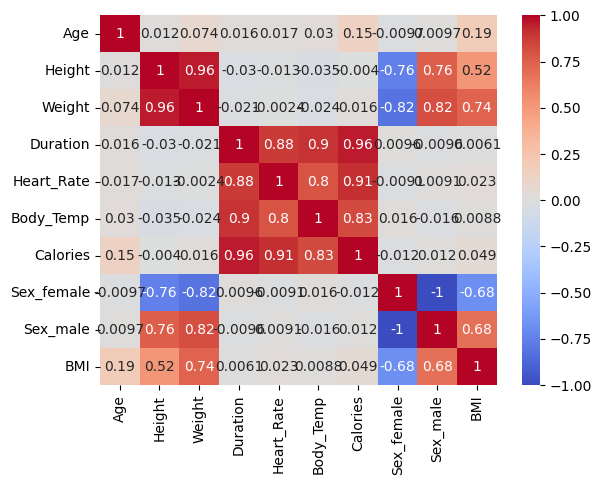

In [167]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [168]:
train_cleaned=train

In [169]:
train_cleaned.head(5)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_female,Sex_male,BMI
0,36,189.0,82.0,26.0,101.0,41.0,150.0,0,1,22.955684
1,64,163.0,60.0,8.0,85.0,39.7,34.0,1,0,22.582709
2,51,161.0,64.0,7.0,84.0,39.8,29.0,1,0,24.690405
3,20,192.0,90.0,25.0,105.0,40.7,140.0,0,1,24.414062
4,38,166.0,61.0,25.0,102.0,40.6,146.0,1,0,22.136740


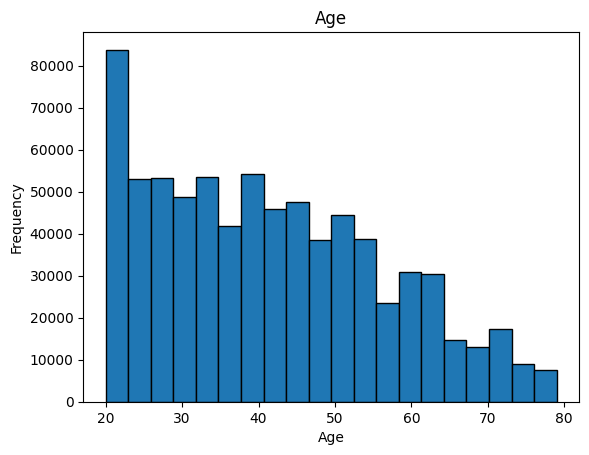

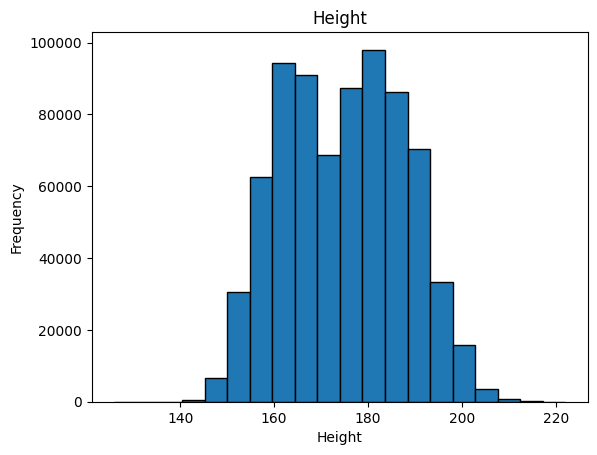

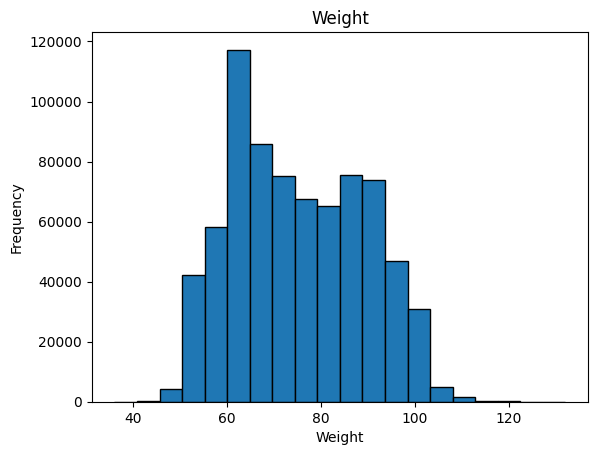

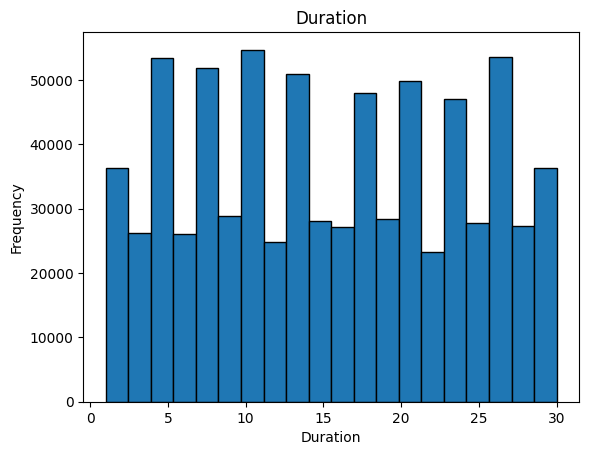

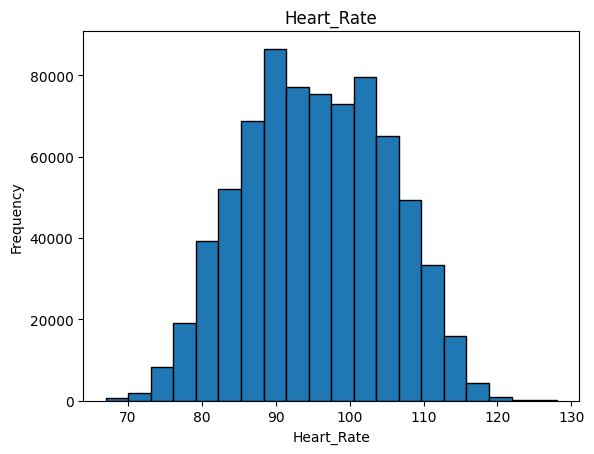

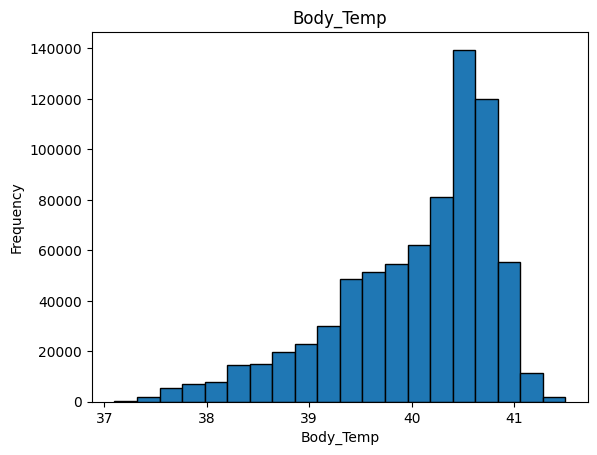

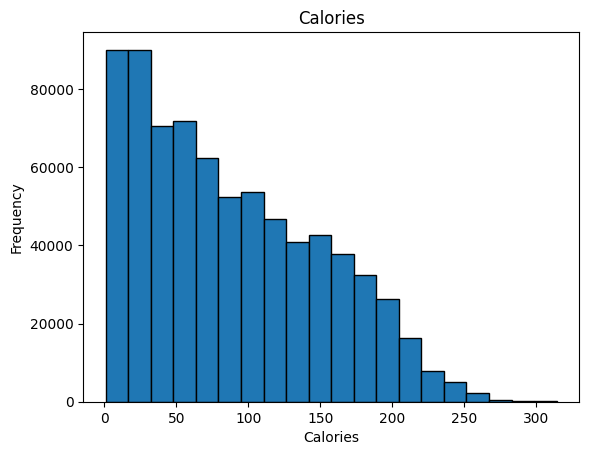

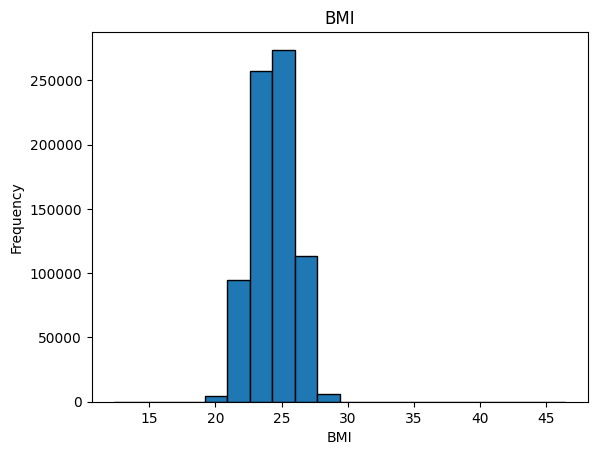

In [171]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
selected_columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
                    'Body_Temp', 'Calories', 'BMI']

for col in selected_columns:
    train[col].plot(kind='hist', bins=20, title=col, edgecolor='black')
    plt.xlabel(col)
    plt.show()

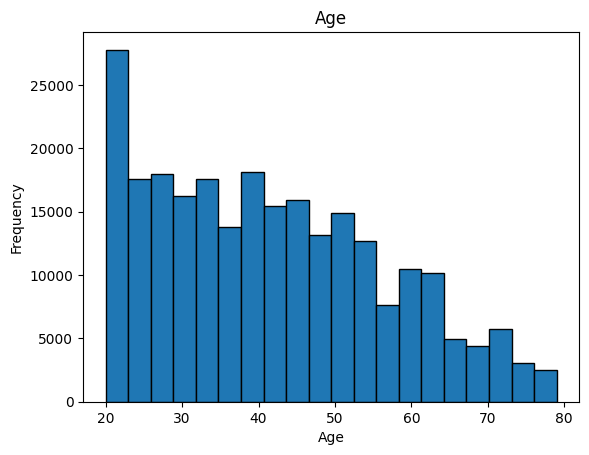

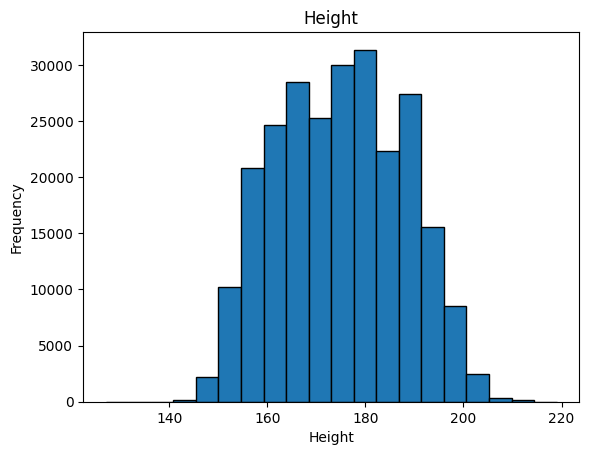

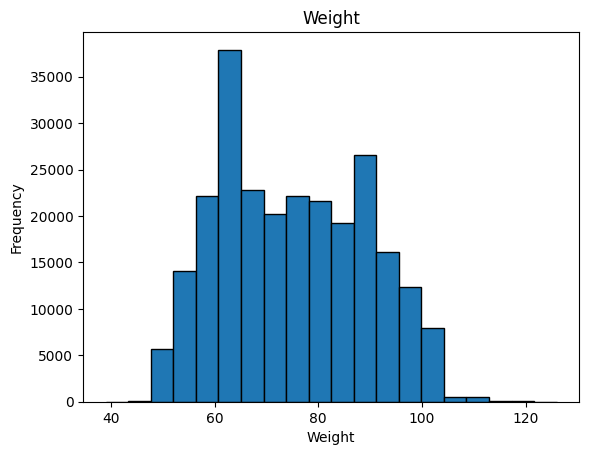

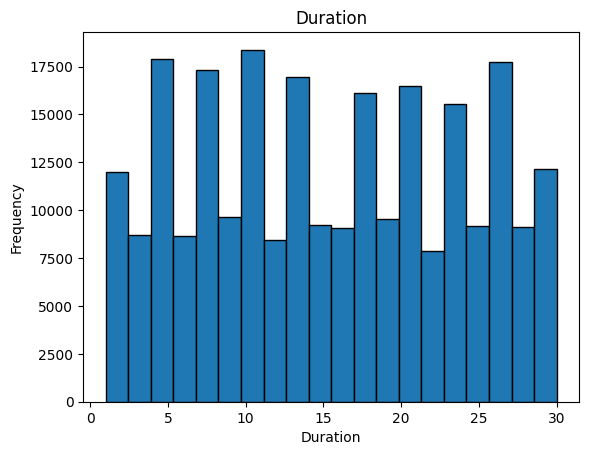

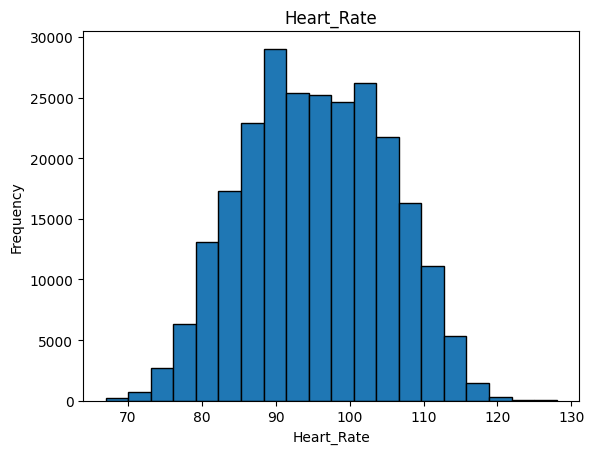

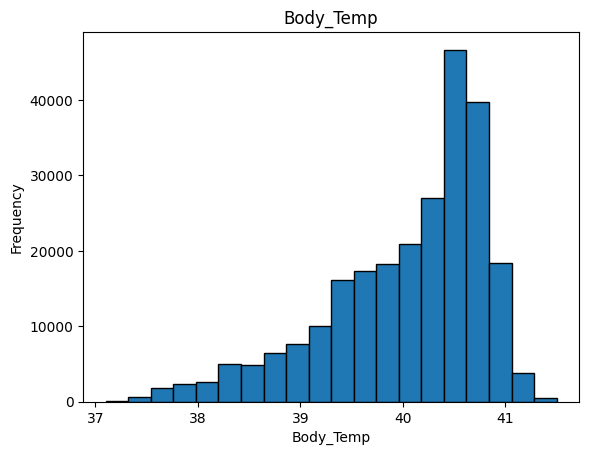

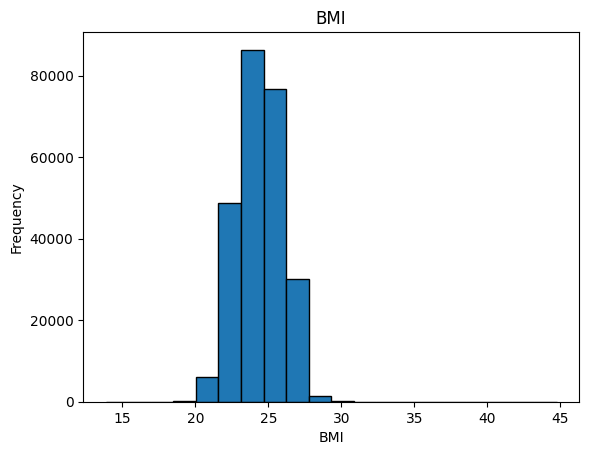

In [182]:
selected_columns_test = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
                    'Body_Temp', 'BMI']

for col in selected_columns_test:
    test[col].plot(kind='hist', bins=20, title=col, edgecolor='black')
    plt.xlabel(col)
    plt.show()

In [178]:
train['Heart_Rate_per_min'] = train['Heart_Rate'] / train['Duration'].replace(0, np.nan)
train['Heart_Rate_per_min'] = train['Heart_Rate_per_min'].fillna(0)

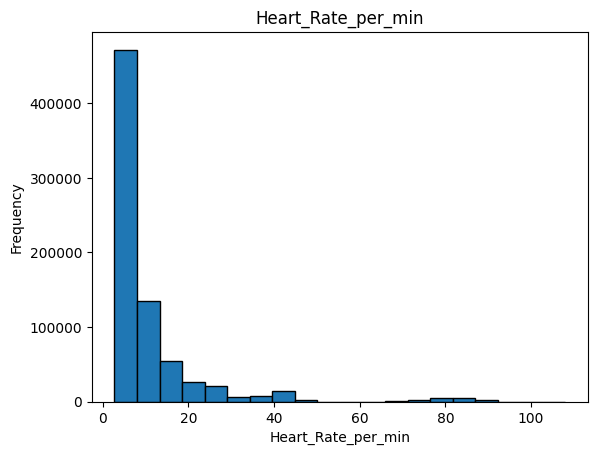

In [185]:
train['Heart_Rate_per_min'].plot(kind='hist', bins=20, title='Heart_Rate_per_min', edgecolor='black')
plt.xlabel('Heart_Rate_per_min')
plt.show()

In [179]:
test['Heart_Rate_per_min'] = test['Heart_Rate'] / test['Duration'].replace(0, np.nan)
test['Heart_Rate_per_min'] = test['Heart_Rate_per_min'].fillna(0)

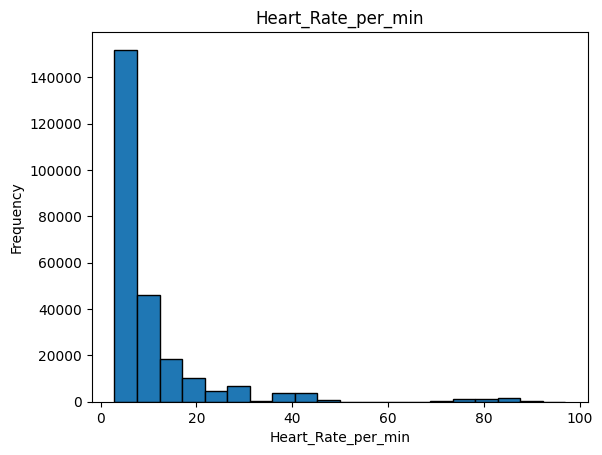

In [186]:
test['Heart_Rate_per_min'].plot(kind='hist', bins=20, title='Heart_Rate_per_min', edgecolor='black')
plt.xlabel('Heart_Rate_per_min')
plt.show()

In [187]:
train.head(5)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_female,Sex_male,BMI,Heart_Rate_per_min
0,36,189.0,82.0,26.0,101.0,41.0,150.0,0,1,22.955684,3.884615
1,64,163.0,60.0,8.0,85.0,39.7,34.0,1,0,22.582709,10.625000
2,51,161.0,64.0,7.0,84.0,39.8,29.0,1,0,24.690405,12.000000
3,20,192.0,90.0,25.0,105.0,40.7,140.0,0,1,24.414062,4.200000
4,38,166.0,61.0,25.0,102.0,40.6,146.0,1,0,22.136740,4.080000


In [188]:
test.head(5)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_female,Sex_male,Heart_Rate_per_min,BMI
0,750000,45,177.0,81.0,7.0,87.0,39.8,0,1,12.428571,25.854639
1,750001,26,200.0,97.0,20.0,101.0,40.5,0,1,5.050000,24.250000
2,750002,29,188.0,85.0,16.0,102.0,40.4,1,0,6.375000,24.049344
3,750003,39,172.0,73.0,20.0,107.0,40.6,1,0,5.350000,24.675500
4,750004,30,173.0,67.0,16.0,94.0,40.5,1,0,5.875000,22.386314


In [192]:
pip install xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


# Model training- Random forest classifier

In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = train.drop('Calories', axis=1)  # Replace 'Calories' with your actual target column
y = train['Calories']

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42, iterations=100)
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Evaluation loop
from sklearn.model_selection import cross_val_predict

for name, model in models.items():
    print(f"--- {name} ---")
    
    # R²
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"Mean R²: {np.mean(r2_scores):.4f}")
    
    # Predict and calculate RMSLE
    preds = cross_val_predict(model, X, y, cv=kf)
    score = rmsle(y, preds)
    print(f"RMSLE: {score:.4f}\n")

--- Random Forest ---
